PROYECTO K-MEANS CLUSTERING - SEGMENTACIÓN DE ESTADOS OPERATIVOS

📊 GENERANDO DATOS SINTÉTICOS...


Generando datos: 100%|████████████████████████| 300/300 [00:03<00:00, 92.38it/s]


✅ Datos generados exitosamente!
📋 Dimensiones del dataset: (300, 4)

🔍 ANALIZANDO DATOS...
       Temperatura   Vibracion     Presion    Velocidad
count   300.000000  300.000000  300.000000   300.000000
mean     90.520373    3.513630  184.347410  2005.578239
std      18.985438    1.444609   33.384245   207.258624
min      59.874287    1.412099  117.587327  1601.243109
25%      72.591359    2.153350  154.970499  1848.955748
50%      89.455018    3.343941  179.979533  1988.433619
75%     105.737884    4.411243  213.655899  2153.898698
max     135.269324    7.439752  265.977962  2568.295021


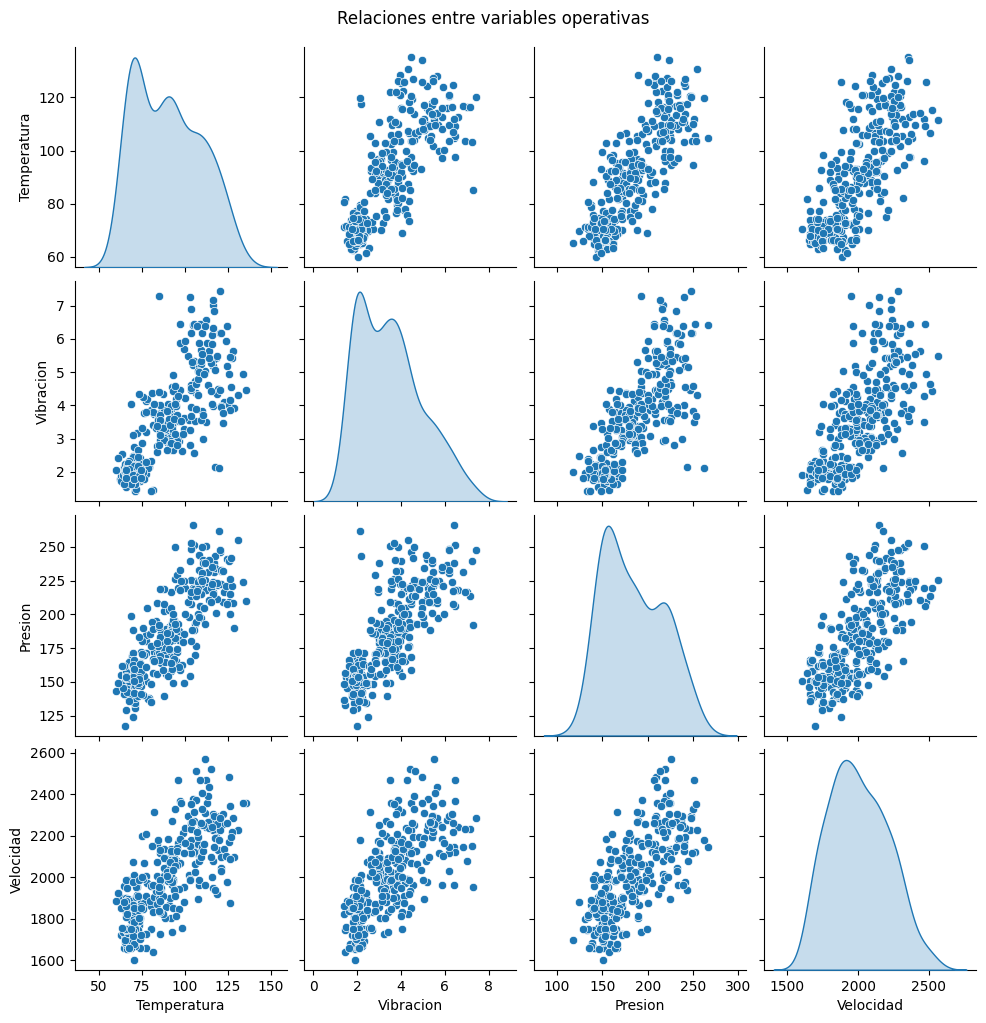


⚙️ PREPROCESANDO DATOS...

🤖 APLICANDO K-MEANS CLUSTERING...


Calculando inercia: 100%|█████████████████████████| 9/9 [00:01<00:00,  8.34it/s]


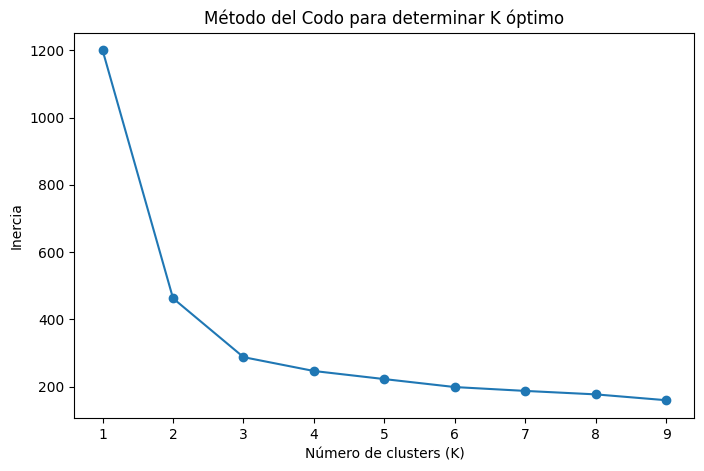

✅ K-Means completado con 3 clusters.

📈 ANALIZANDO CLUSTERS...


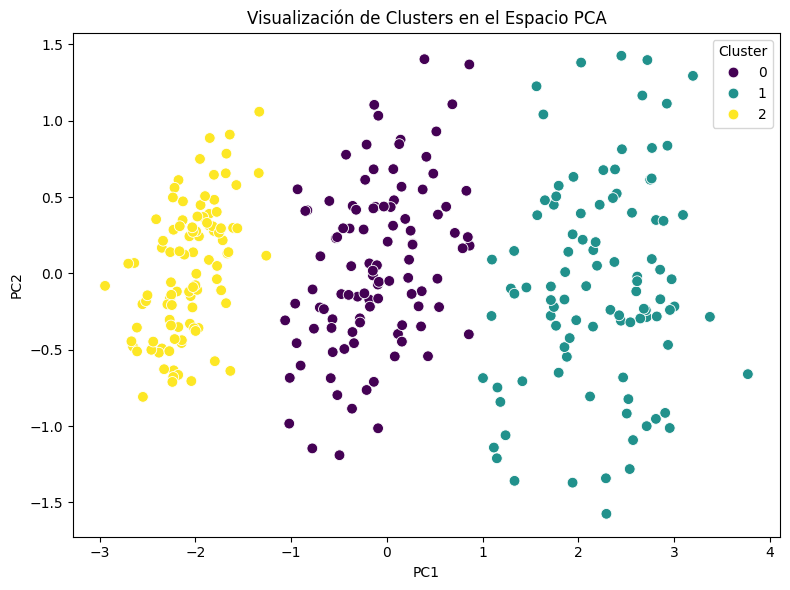


CARACTERÍSTICAS PROMEDIO POR CLUSTER
         Temperatura  Vibracion  Presion  Velocidad
Cluster                                            
0              89.27       3.47   180.25    2004.98
1             112.82       5.09   223.43    2211.51
2              69.95       2.01   150.22    1804.38

🧠 INTERPRETACIÓN DE LOS RESULTADOS:

Cluster 0 → Operación normal (bajas temperaturas y vibraciones)
Cluster 1 → Operación forzada o exigida
Cluster 2 → Operación anómala o potencial falla

Esta clasificación permite identificar comportamientos no deseados antes de que se produzca una falla real.


🎉 PROYECTO COMPLETADO EXITOSAMENTE!


In [1]:
# =============================================================================
# PROYECTO: SEGMENTACIÓN DE ESTADOS OPERATIVOS CON K-MEANS
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("PROYECTO K-MEANS CLUSTERING - SEGMENTACIÓN DE ESTADOS OPERATIVOS")
print("=" * 70)

# =============================================================================
# 1. GENERACIÓN DE DATOS SINTÉTICOS
# =============================================================================
print("\n📊 GENERANDO DATOS SINTÉTICOS...")

np.random.seed(42)
datos = []

# Simular 3 modos de operación
for i in tqdm(range(300), desc="Generando datos", ncols=80):
    if i < 100:
        # Modo 1: Operación normal
        temp = np.random.normal(70, 5)
        vib = np.random.normal(2.0, 0.3)
        pres = np.random.normal(150, 10)
        vel = np.random.normal(1800, 100)
    elif i < 200:
        # Modo 2: Operación forzada
        temp = np.random.normal(90, 8)
        vib = np.random.normal(3.5, 0.5)
        pres = np.random.normal(180, 15)
        vel = np.random.normal(2000, 120)
    else:
        # Modo 3: Operación anómala
        temp = np.random.normal(110, 10)
        vib = np.random.normal(5.0, 1.0)
        pres = np.random.normal(220, 20)
        vel = np.random.normal(2200, 150)

    datos.append([temp, vib, pres, vel])
    time.sleep(0.01)

columnas = ['Temperatura', 'Vibracion', 'Presion', 'Velocidad']
df = pd.DataFrame(datos, columns=columnas)

print("✅ Datos generados exitosamente!")
print(f"📋 Dimensiones del dataset: {df.shape}")

# =============================================================================
# 2. ANÁLISIS EXPLORATORIO
# =============================================================================
print("\n🔍 ANALIZANDO DATOS...")
time.sleep(1)
print(df.describe())

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Relaciones entre variables operativas", y=1.02)
plt.show()

# =============================================================================
# 3. PREPROCESAMIENTO
# =============================================================================
print("\n⚙️ PREPROCESANDO DATOS...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# =============================================================================
# 4. APLICACIÓN DE K-MEANS
# =============================================================================
print("\n🤖 APLICANDO K-MEANS CLUSTERING...")

# Determinar el número óptimo de clusters con el método del codo
inercia = []
K = range(1, 10)
for k in tqdm(K, desc="Calculando inercia", ncols=80):
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(X_scaled)
    inercia.append(modelo.inertia_)
    time.sleep(0.1)

plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.title("Método del Codo para determinar K óptimo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.show()

# Elegir K=3 basado en el gráfico
k_optimo = 3
modelo_kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = modelo_kmeans.fit_predict(X_scaled)

print(f"✅ K-Means completado con {k_optimo} clusters.")

# =============================================================================
# 5. ANÁLISIS DE RESULTADOS
# =============================================================================
print("\n📈 ANALIZANDO CLUSTERS...")

# Visualización con PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60)
plt.title('Visualización de Clusters en el Espacio PCA')
plt.tight_layout()
plt.show()

# Características promedio de cada cluster
print("\n" + "="*60)
print("CARACTERÍSTICAS PROMEDIO POR CLUSTER")
print("="*60)
print(df.groupby('Cluster').mean().round(2))

# =============================================================================
# 6. INTERPRETACIÓN INGENIERIL
# =============================================================================
print("\n🧠 INTERPRETACIÓN DE LOS RESULTADOS:")
print("""
Cluster 0 → Operación normal (bajas temperaturas y vibraciones)
Cluster 1 → Operación forzada o exigida
Cluster 2 → Operación anómala o potencial falla

Esta clasificación permite identificar comportamientos no deseados antes de que se produzca una falla real.
""")

print("\n🎉 PROYECTO COMPLETADO EXITOSAMENTE!")
